In [2]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_maven
import rq_aux
import re
import matplotlib.pyplot as plt 
import seaborn as sns

importlib.reload(regex_maven)
importlib.reload(rq_aux)
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [3]:
regex = regex_maven
plugins = regex.plugins
categories = regex.categories
prefix = "maven_"
build_tool = "maven"
is_build_tool = "is_maven"
noerror = False
output_path = "../data/output_data/"
#overview_dataset = f"{output_path}overview_daylight_noerror.csv"
#alltasks_dataset = f"{output_path}all_tasks_noerror.csv"

overview_dataset = f"{output_path}overview_cloc2_noerror.csv"
alltasks_dataset = f"{output_path}all_tasks_cloc2_noerror.csv"

In [4]:
rq_aux.check_categories(regex)

In [5]:
df = rq_aux.read_all_tasks(alltasks_dataset, build_tool, noerror)

Build tool maven = 137333


In [6]:
tasks = {}
for x in sizes1:
  tasks[x] = rq_aux.get_tasks_by_kind(df[df["size"] == x], plugins)

tasks['all'] = rq_aux.get_tasks_by_kind(df, plugins)

In [7]:
sum_tasks = {}
for x in sizes2:
  sum_tasks[x] = rq_aux.calc_energy_by_task(tasks[x])


In [8]:
for x in sizes2:
  print(f"**** {x.title()} ****")
  rq_aux.print_all_tasks(rq_aux.filter_tasks_by(sum_tasks[x], '', 0.02))
  print("")

**** All ****
total: Energy: 20307582.986063533 (100.0%)
surefire: Energy: 7796911.733151135 (38.4%)
archetype-update: Energy: 3204375.4461364676 (15.8%)
failsafe: Energy: 1507843.0673714953 (7.4%)
compile: Energy: 951833.8920114206 (4.7%)
install: Energy: 924201.077625588 (4.6%)
jacoco: Energy: 813013.2433833756 (4.0%)
testcomp: Energy: 557837.9762774397 (2.7%)
javadoc: Energy: 527314.186842948 (2.6%)
other: Energy: 422197.99533118494 (2.1%)

**** Small ****
total: Energy: 618145.3455386658 (100.0%)
surefire: Energy: 157746.30060735362 (25.5%)
javadoc: Energy: 157420.44625474006 (25.5%)
checkstyle: Energy: 39573.518747656766 (6.4%)
git-commit-id: Energy: 31874.390578375645 (5.2%)
frontend: Energy: 30960.61221441816 (5.0%)
rewrite: Energy: 30478.21224843296 (4.9%)
compile: Energy: 22809.525302626458 (3.7%)
spotless: Energy: 15536.089259884986 (2.5%)
testcomp: Energy: 13371.555779414939 (2.2%)
jar: Energy: 13241.657906727696 (2.1%)

**** Medium ****
total: Energy: 9795752.582969584 (100

In [9]:
df = pd.read_csv(overview_dataset)

# Remove Maven Workflows Without Maven Subtasks
df = rq_aux.remove_workflows_no_subtask(df[df[is_build_tool]], prefix, plugins)

df_size = rq_aux.create_dfs_size(df, is_build_tool)

Workflows No Subtask: Removed 210 workflows: 950 -> 740


In [10]:
# Calculate maven-related energy consumption for all maven projects
tasks = {}

for x in sizes2:
  print(f"*** {x.title()} ***")
  tasks[x] = rq_aux.calc_sum(df_size[x], prefix, plugins)
  rq_aux.calc_workflow_energy_proportion (df_size[x], tasks[x])
  rq_aux.calc_ratio(tasks[x])
  print(f"{df_size[x]['energy'].sum():0.2f}")  
  

*** All ***
Energy:  20307583 (24.4%)
Seconds:  1098762177084 (20.2%)
83229394.26
*** Small ***
Energy:  618145 (37.3%)
Seconds:  35638455380 (35.3%)
1655321.52
*** Medium ***
Energy:  9795753 (37.6%)
Seconds:  460619837830 (31.0%)
26034957.97
*** Large ***
Energy:  9893685 (17.8%)
Seconds:  602503883874 (15.6%)
55539114.76


/Users/sergio/pesquisa/ICT4S_2025/analysis/../scripts/rq_aux.py:46: RuntimeWarning: invalid value encountered in scalar divide
  return round(100 * x / y, n)


In [11]:
for x in sizes2:
  print(f"**** {x.title()} ****")
  rq_aux.print_tasks_summary(rq_aux.filter_tasks_by(tasks[x], 'energy', 0.02))
  print("")

**** All ****
*** Total ***
N:  100.0%;  Energy:  100.0%;  Seconds:  100.0%;  Rat_P:  nan%;  Rat_N:  100.0%;  
*** Maven_Surefire ***
N:  6.1%;  Energy:  38.4%;  Seconds:  43.7%;  Rat_P:  nan%;  Rat_N:  630.3%;  
*** Maven_Archetype-Update ***
N:  0.1%;  Energy:  15.8%;  Seconds:  9.5%;  Rat_P:  nan%;  Rat_N:  30097.3%;  
*** Maven_Failsafe ***
N:  0.4%;  Energy:  7.4%;  Seconds:  10.3%;  Rat_P:  nan%;  Rat_N:  1968.5%;  
*** Maven_Compile ***
N:  15.0%;  Energy:  4.7%;  Seconds:  3.3%;  Rat_P:  nan%;  Rat_N:  31.3%;  
*** Maven_Install ***
N:  4.7%;  Energy:  4.6%;  Seconds:  5.1%;  Rat_P:  nan%;  Rat_N:  96.3%;  
*** Maven_Jacoco ***
N:  3.0%;  Energy:  4.0%;  Seconds:  3.3%;  Rat_P:  nan%;  Rat_N:  134.7%;  
*** Maven_Testcomp ***
N:  10.4%;  Energy:  2.7%;  Seconds:  1.7%;  Rat_P:  nan%;  Rat_N:  26.5%;  
*** Maven_Javadoc ***
N:  2.4%;  Energy:  2.6%;  Seconds:  2.6%;  Rat_P:  nan%;  Rat_N:  106.1%;  
*** Maven_Other ***
N:  4.7%;  Energy:  2.1%;  Seconds:  2.6%;  Rat_P:  nan%;  R

In [12]:
energy_category = {}

for x in sizes2:
  energy_category[x] = rq_aux.calc_energy_category(categories, plugins, 'energy', tasks[x], prefix)

print(energy_category['all'])
print(sum(energy_category['all'].values()))
print(tasks['all']["total"]["energy"], tasks['all'][prefix + "other"]["energy"])

{'Integration Test': 1509835.2357659503, 'Unit Test': 8149172.738293465, 'Compile': 1704448.497080545, 'Documentation': 658658.2039078423, 'Install': 4128576.5237620557, 'Linter': 1539879.8954139084, 'Packaging': 820275.4051418037, 'Others': 1374538.4913667778, 'Unclassified': 422197.9953311839}
20307582.986063533
20307582.98606354 422197.9953311839


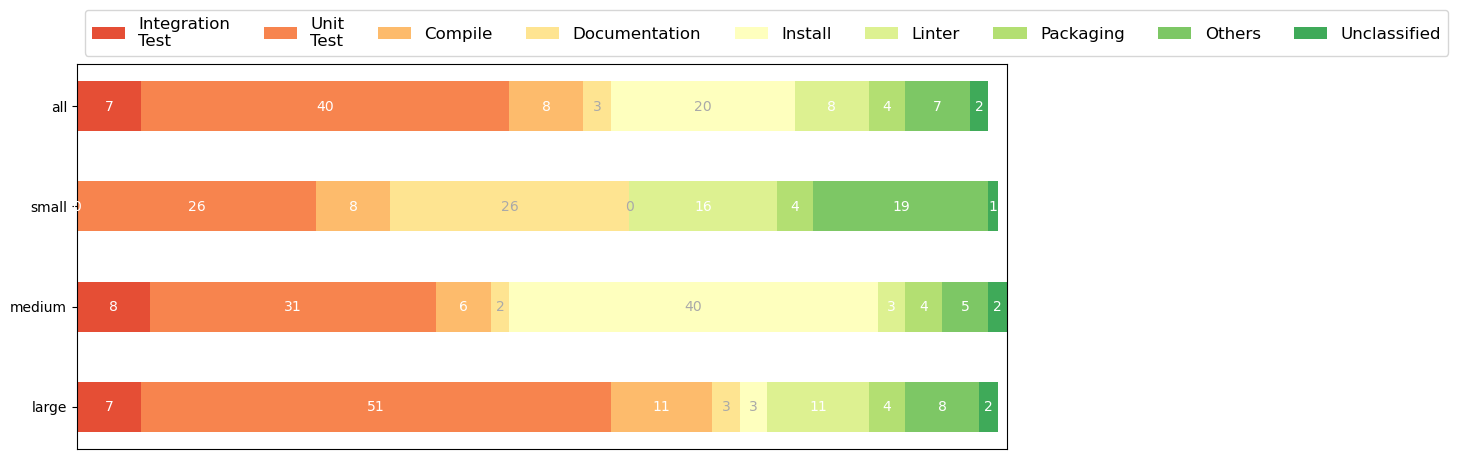

In [13]:
cat_ratios = {}
for key, value in energy_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in energy_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()


In [14]:
n_category = {}

for x in sizes2:
  n_category[x] = rq_aux.calc_energy_category(categories, plugins, 'n', tasks[x], prefix)

print(n_category['all'])
print(sum(n_category['all'].values()))
print(tasks['all']["total"]["n"], tasks['all'][prefix + "other"]["n"])

{'Integration Test': 589, 'Unit Test': 8470, 'Compile': 37431, 'Documentation': 4597, 'Install': 6559, 'Linter': 18259, 'Packaging': 23200, 'Others': 31764, 'Unclassified': 6464}
137333
137333 6464


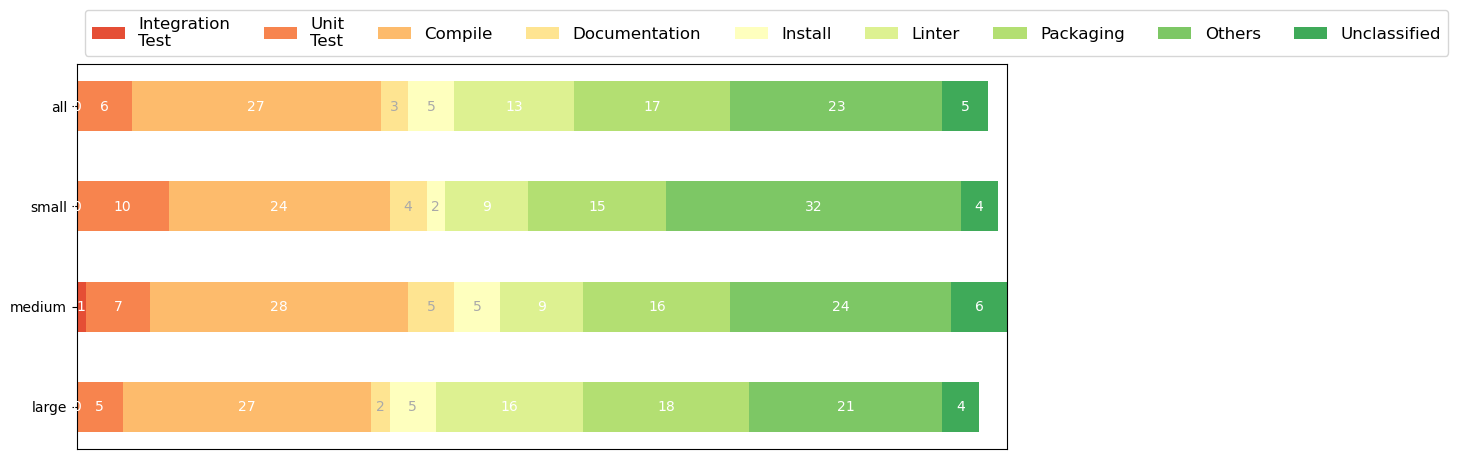

In [15]:
cat_ratios = {}
for key, value in n_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in n_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()

In [16]:
time_category = {}

for x in sizes2:
  time_category[x] = rq_aux.calc_energy_category(categories, plugins, 'seconds', tasks[x], prefix)

print(time_category['all'])
print(sum(time_category['all'].values()))
print(tasks['all']["total"]["seconds"], tasks['all'][prefix + "other"]["seconds"])

{'Integration Test': 112896072768, 'Unit Test': 503028323050, 'Compile': 63344705151, 'Documentation': 41875634210, 'Install': 160116862095, 'Linter': 78847872477, 'Packaging': 41006830083, 'Others': 69426248847, 'Unclassified': 28219628403}
1098762177084
1098762177084 28219628403


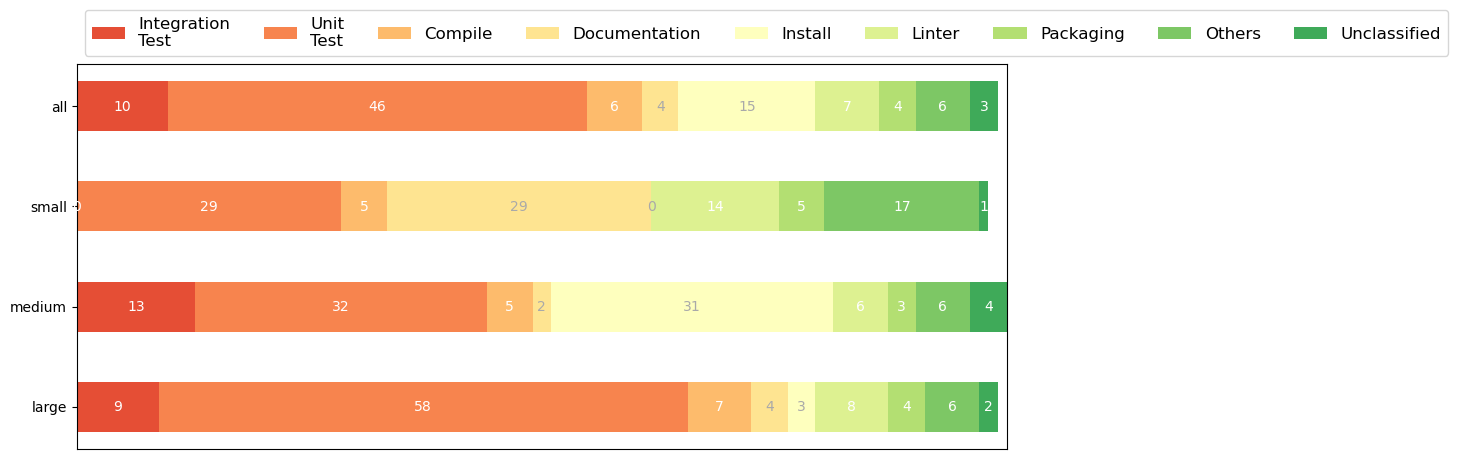

In [17]:
cat_ratios = {}
for key, value in time_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in time_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()